# *ISE - 3 DATA SCIENCE*




# EDA: INTERPRETATION OF ASSUMPTION OF LINEAR REGRESSION


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
dataset = pd.read_csv('/content/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


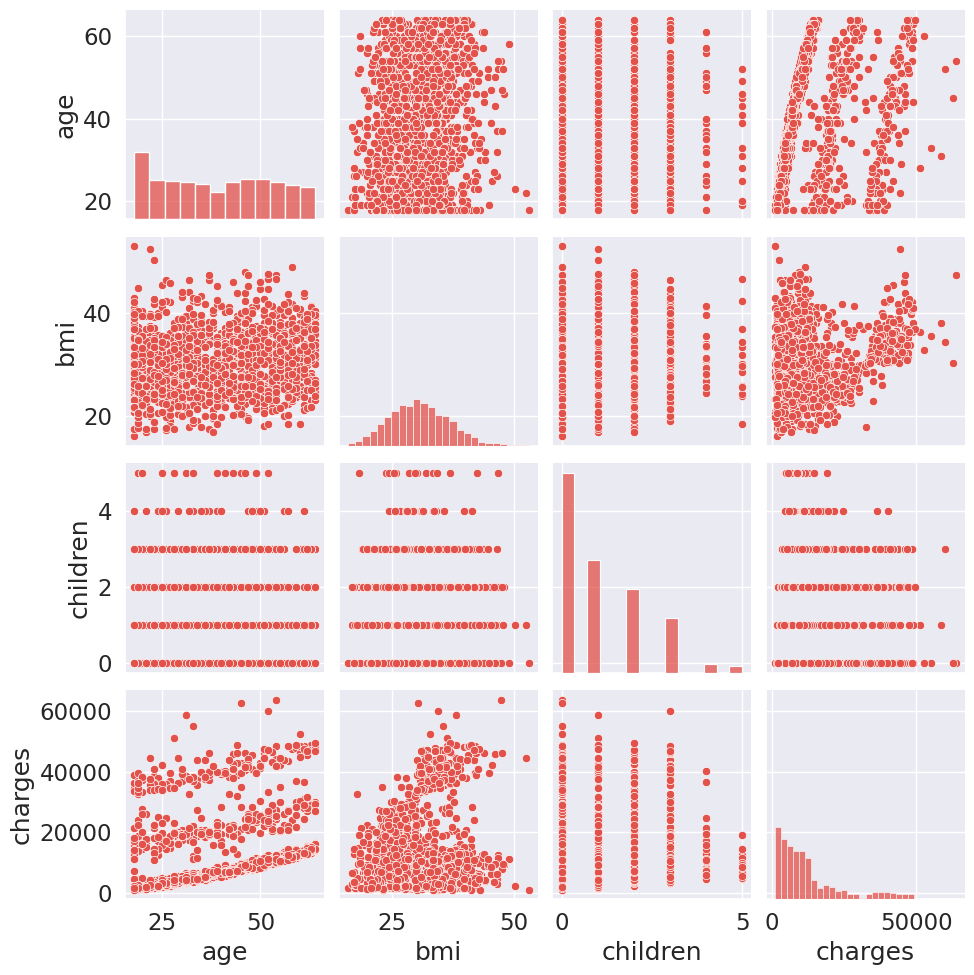

In [6]:
sns.pairplot(dataset)

Here we can see as age is increasing, insurance charges are also increasing . Another important insight here would be 3 different groups can be seen here. This could be reflective of 3 different insurance packages with different benefits

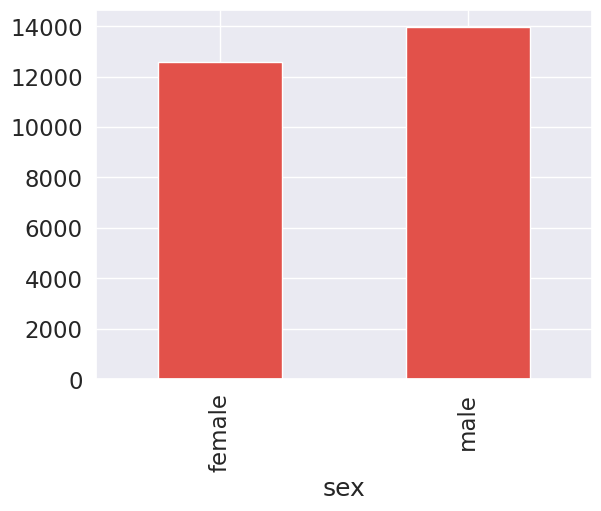

In [7]:
dataset.groupby('sex')['charges'].mean().plot.bar()
plt.show()

Here Male have high Charges than Females

<function matplotlib.pyplot.show(close=None, block=None)>

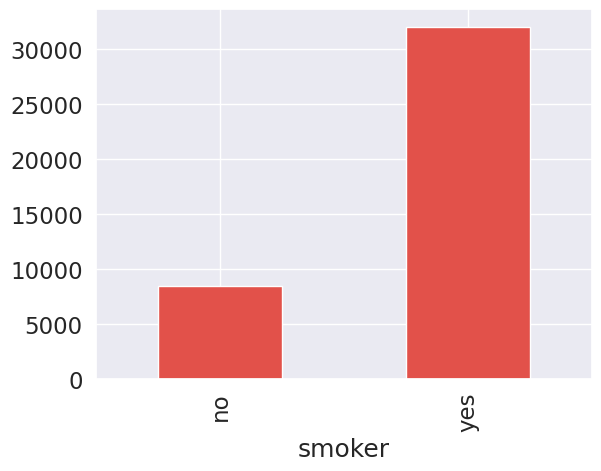

In [8]:
dataset.groupby('smoker')['charges'].mean().plot.bar()
plt.show

charges are high if the customer is a smoker as there is a high chance he/she is at high risk of other diseases

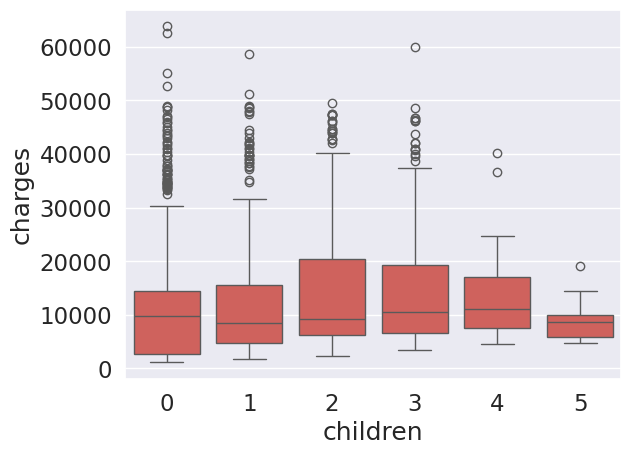

In [9]:
sns.boxplot(y='charges',x='children',data=dataset)
plt.show()

Charges are low if having children more than 3

## 1. **Linearity**

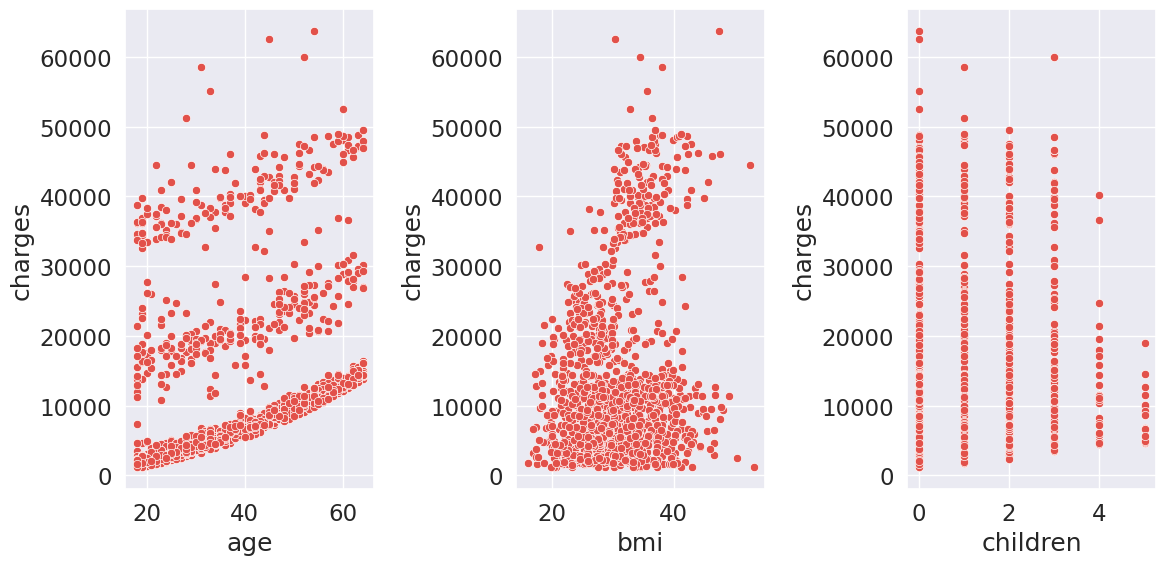

In [10]:
# Check linearity using scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='charges', data=dataset)
plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='charges', data=dataset)
plt.subplot(1, 3, 3)
sns.scatterplot(x='children', y='charges', data=dataset)
plt.tight_layout()
plt.show()


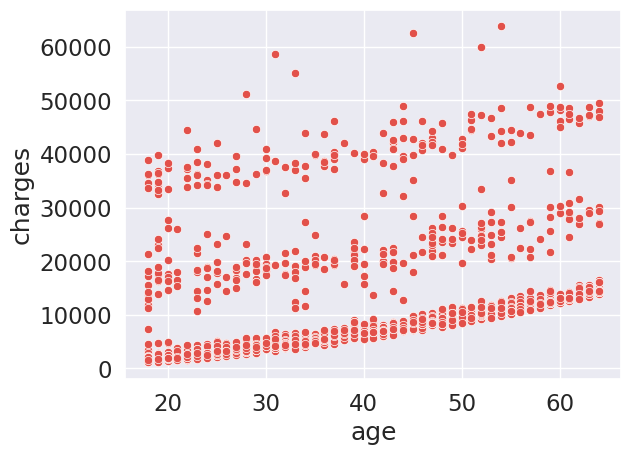

In [11]:
sns.scatterplot(x=dataset['age'],y=dataset['charges'])
plt.show()

## **Regression and metrics for model performance**

In [12]:
dataset=pd.get_dummies(dataset,columns=['sex','smoker'],drop_first=True)

In [13]:
dataset.groupby('region')['charges'].median().sort_values()

region
southwest     8798.593000
northwest     8965.795750
southeast     9294.131950
northeast    10057.652025
Name: charges, dtype: float64

In [14]:
dataset['region']=dataset['region'].map({'northeast':4,'southeast':3,'northwest':2,'southwest':1})

In [15]:
dataset.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,1,16884.92400,False,True
1,18,33.770,1,3,1725.55230,True,False
2,28,33.000,3,3,4449.46200,True,False
3,33,22.705,0,2,21984.47061,True,False
4,32,28.880,0,2,3866.85520,True,False


In [16]:
x = dataset.drop(columns='charges')
y = dataset['charges']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [18]:
x_test.shape,x_train.shape

((402, 6), (936, 6))

In [19]:
x_train_const=sm.add_constant(x_train)

In [22]:
print(type(y_train))
print(type(x_train_const))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [23]:
print(y_train.isnull().sum())
print(x_train_const.isnull().sum())

0
const         0
age           0
bmi           0
children      0
region        0
sex_male      0
smoker_yes    0
dtype: int64


In [24]:
y_train = np.asarray(y_train)
x_train_const = np.asarray(x_train_const)

In [26]:
!pip install numpy
import numpy as np
import statsmodels.api as sm

# Investigate the data types of y_train and x_train_const
print(f'y_train data type: {y_train.dtype}')
print(f'x_train_const data type: {x_train_const.dtype}')

# If either data type is not 'float', convert it to 'float'
if y_train.dtype != 'float':
    y_train = y_train.astype('float')
if x_train_const.dtype != 'float':
    x_train_const = x_train_const.astype('float')

# Fit the model again
model = sm.OLS(y_train, x_train_const).fit()

# Print the model summary
model.summary()

y_train data type: float64
x_train_const data type: object


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     419.4
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          2.36e-260
Time:                        09:26:43   Log-Likelihood:                -9496.4
No. Observations:                 936   AIC:                         1.901e+04
Df Residuals:                     929   BIC:                         1.904e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.248e+04   1222.852    -10.210      0.000   -1.49e+04   -1.01e+04
x1           257.4371     14.601     17.632      0.000     228.783     286.091
x2           320.3831     32.714      9.793      0.000     256.181     384.585
x3           478.4765    168.666      2.837      0.005     147.465     809.488
x4           187.2605    184.149      1.017      0.309    -174.137     548.658
x5           -51.5434    405.908     -0.127      0.899    -848.147     745.060
x6          2.338e+04    506.343     46.179      0.000    2.24e+04    2.44e+04
==============================================================================
Omnibus:                      231.572   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              565.172
Skew:                           1.304   Prob(JB):                    1.88e-123
Kurtosis:                       5.772   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model=sm.OLS(y_train,x_train_const).fit()
model.summary()

In [27]:
x_test_const=sm.add_constant(x_test)
y_pred=model.predict(x_test_const)

In [28]:
rmse=np.sqrt(np.sum((y_pred-y_test)**2)/len(x_test))
rmse

5786.979119869881

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred_lr=lr.predict(x_test)

In [31]:
lr.score(x_test,y_test)

0.7899966158988865

In [32]:
from sklearn.metrics import mean_squared_error
rmse_lr=np.sqrt(mean_squared_error(y_test,y_pred_lr))
rmse_lr

5786.979119869881

## 2. **Mean of Residuals**

In [34]:
y_pred_train = lr.predict(x_train)

In [35]:
residuals = y_train - y_pred_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.2437534383219532e-12


## 3. **Check for Normality of error terms/residuals**

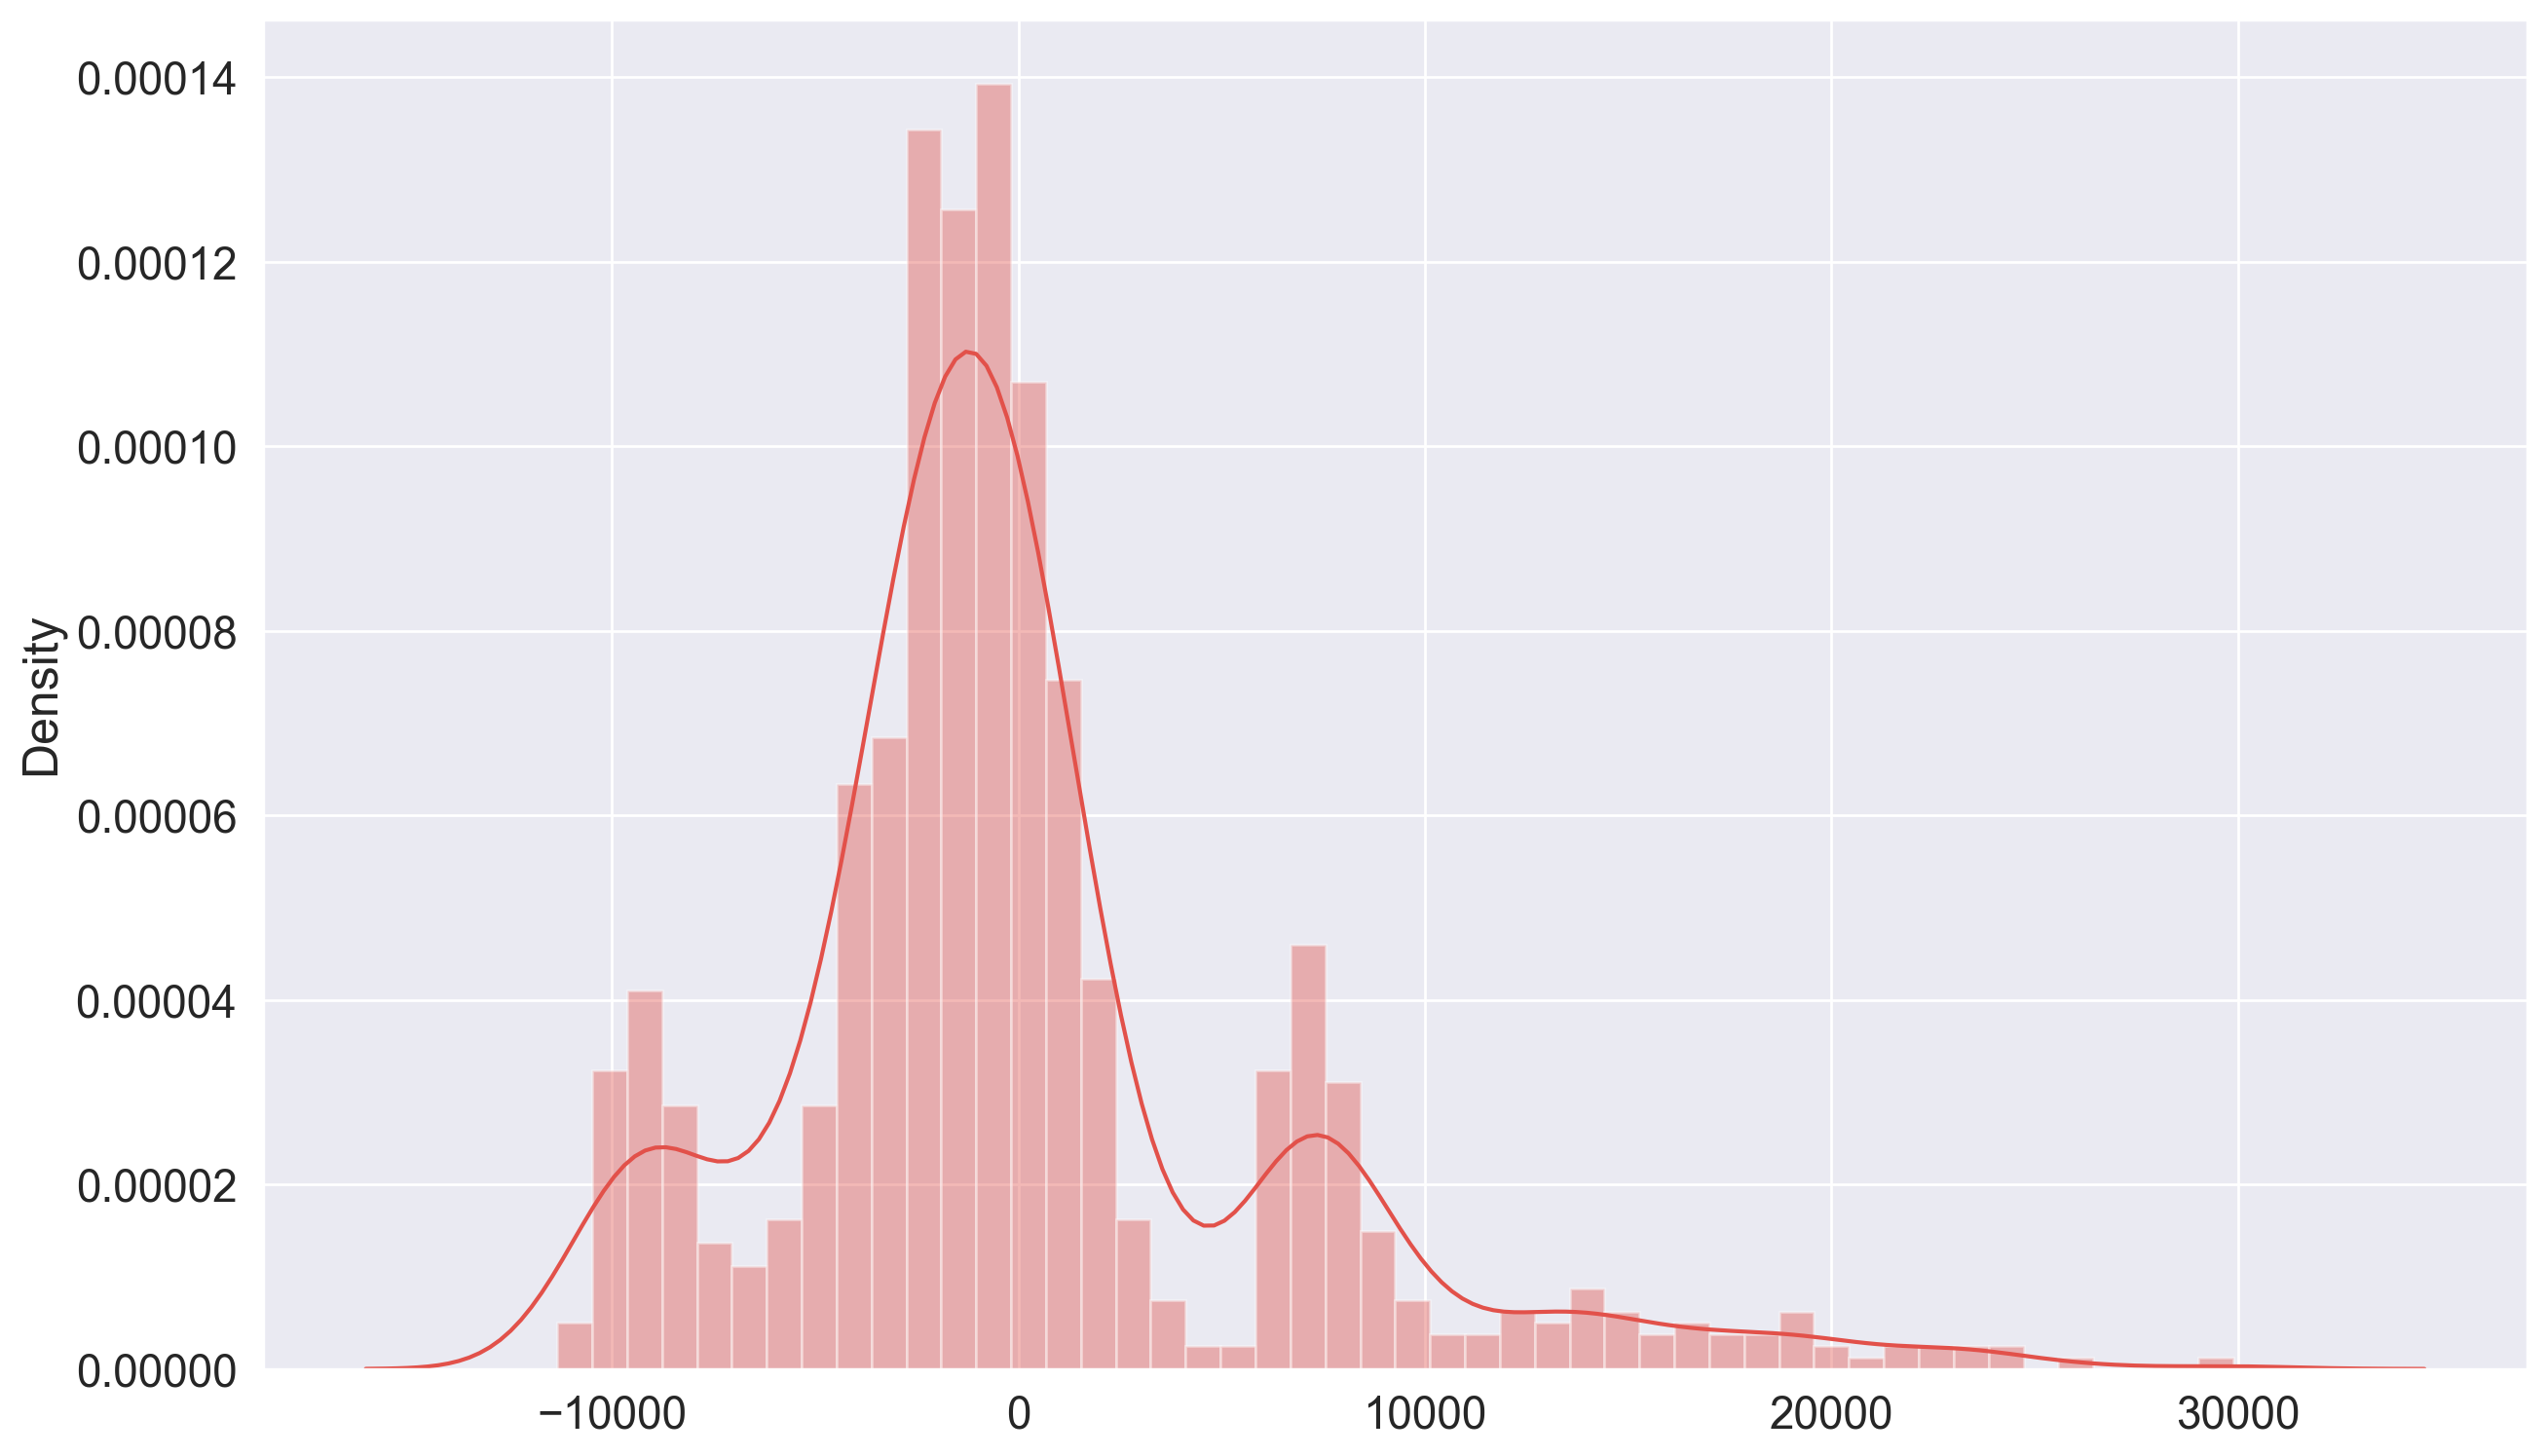

In [ ]:
sns.distplot(model.resid)
plt.show()

Here we can see visually also that residuals are not normally distributed and there is high skewness

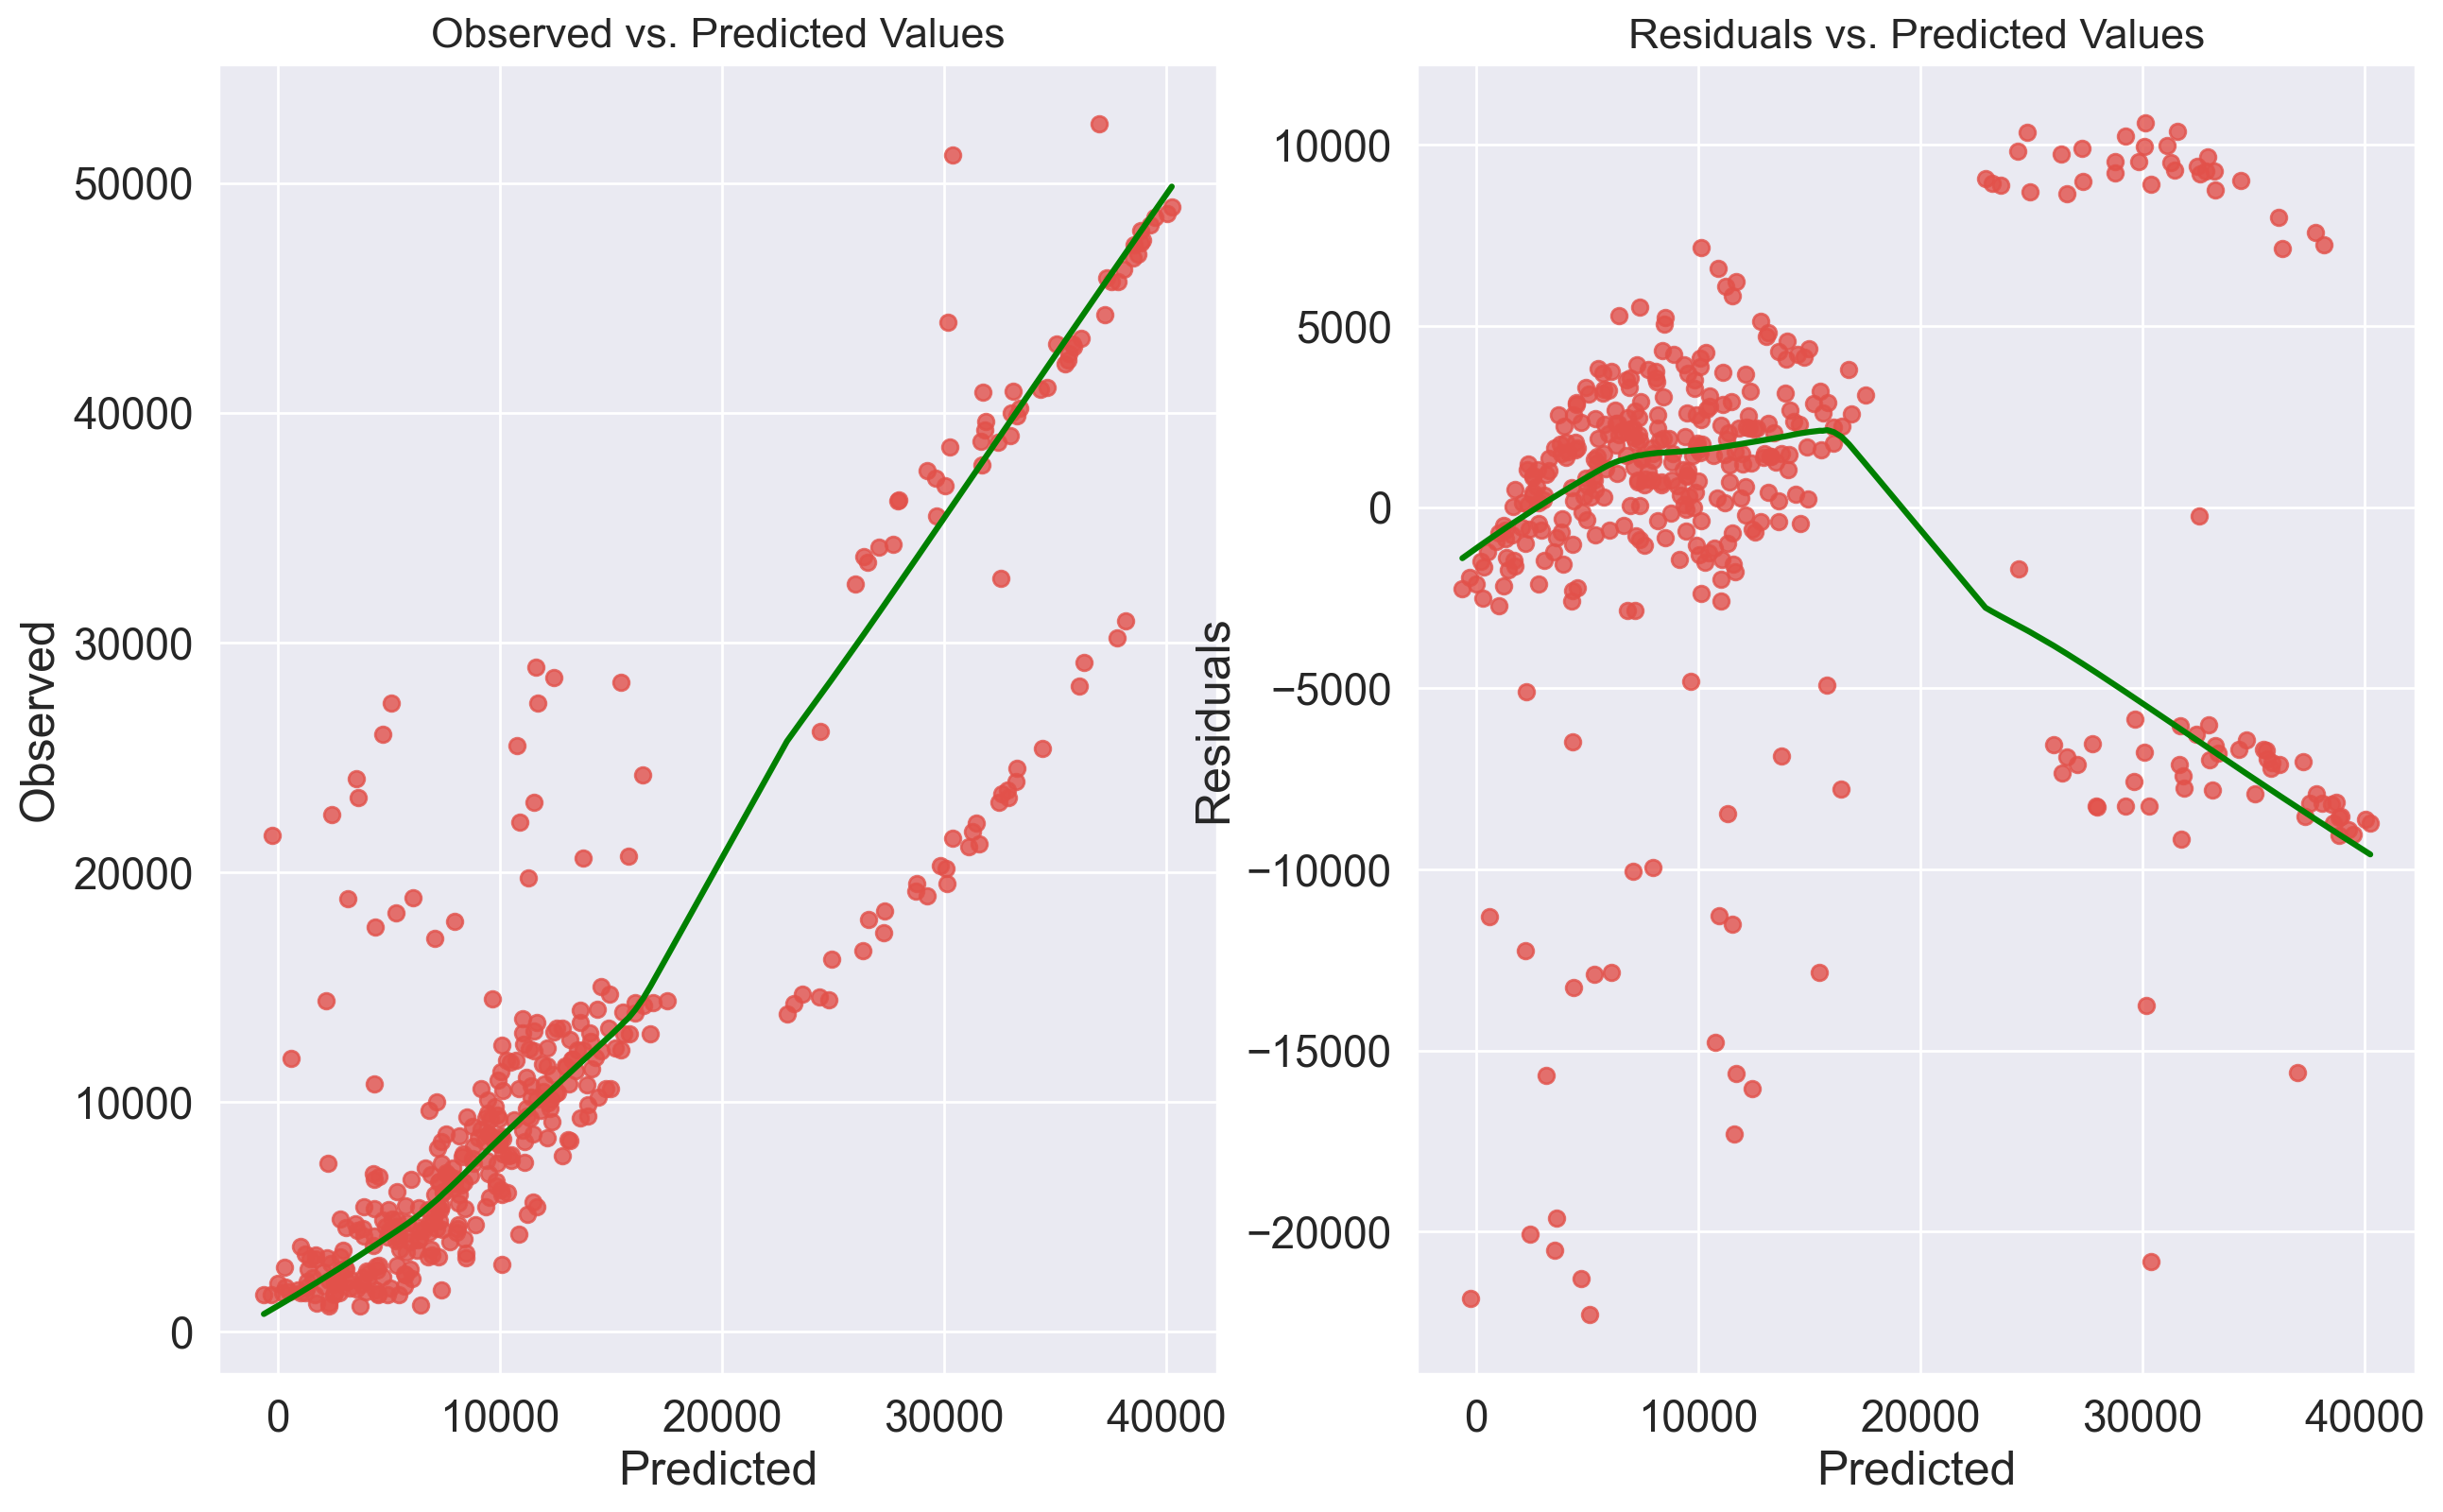

In [ ]:
%config InlineBackend.figure_format ='retina'
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)


def linearity_test(model, y):

    fitted_vals = y_pred
    resids = y_pred-y_test
    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'green'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'green'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

linearity_test(model, y_test)

 The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or around horizontal line in the latter one. In both cases with a low linearity of residuals can be seen.

In [ ]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=model, frac=0.5)

(1.1201827785889402, 0.11093404968185097)

## 3. **Check for Homoscedasticity**

[('F statistic', 1.2690649514972379), ('p-value', 0.00533004080703305)]

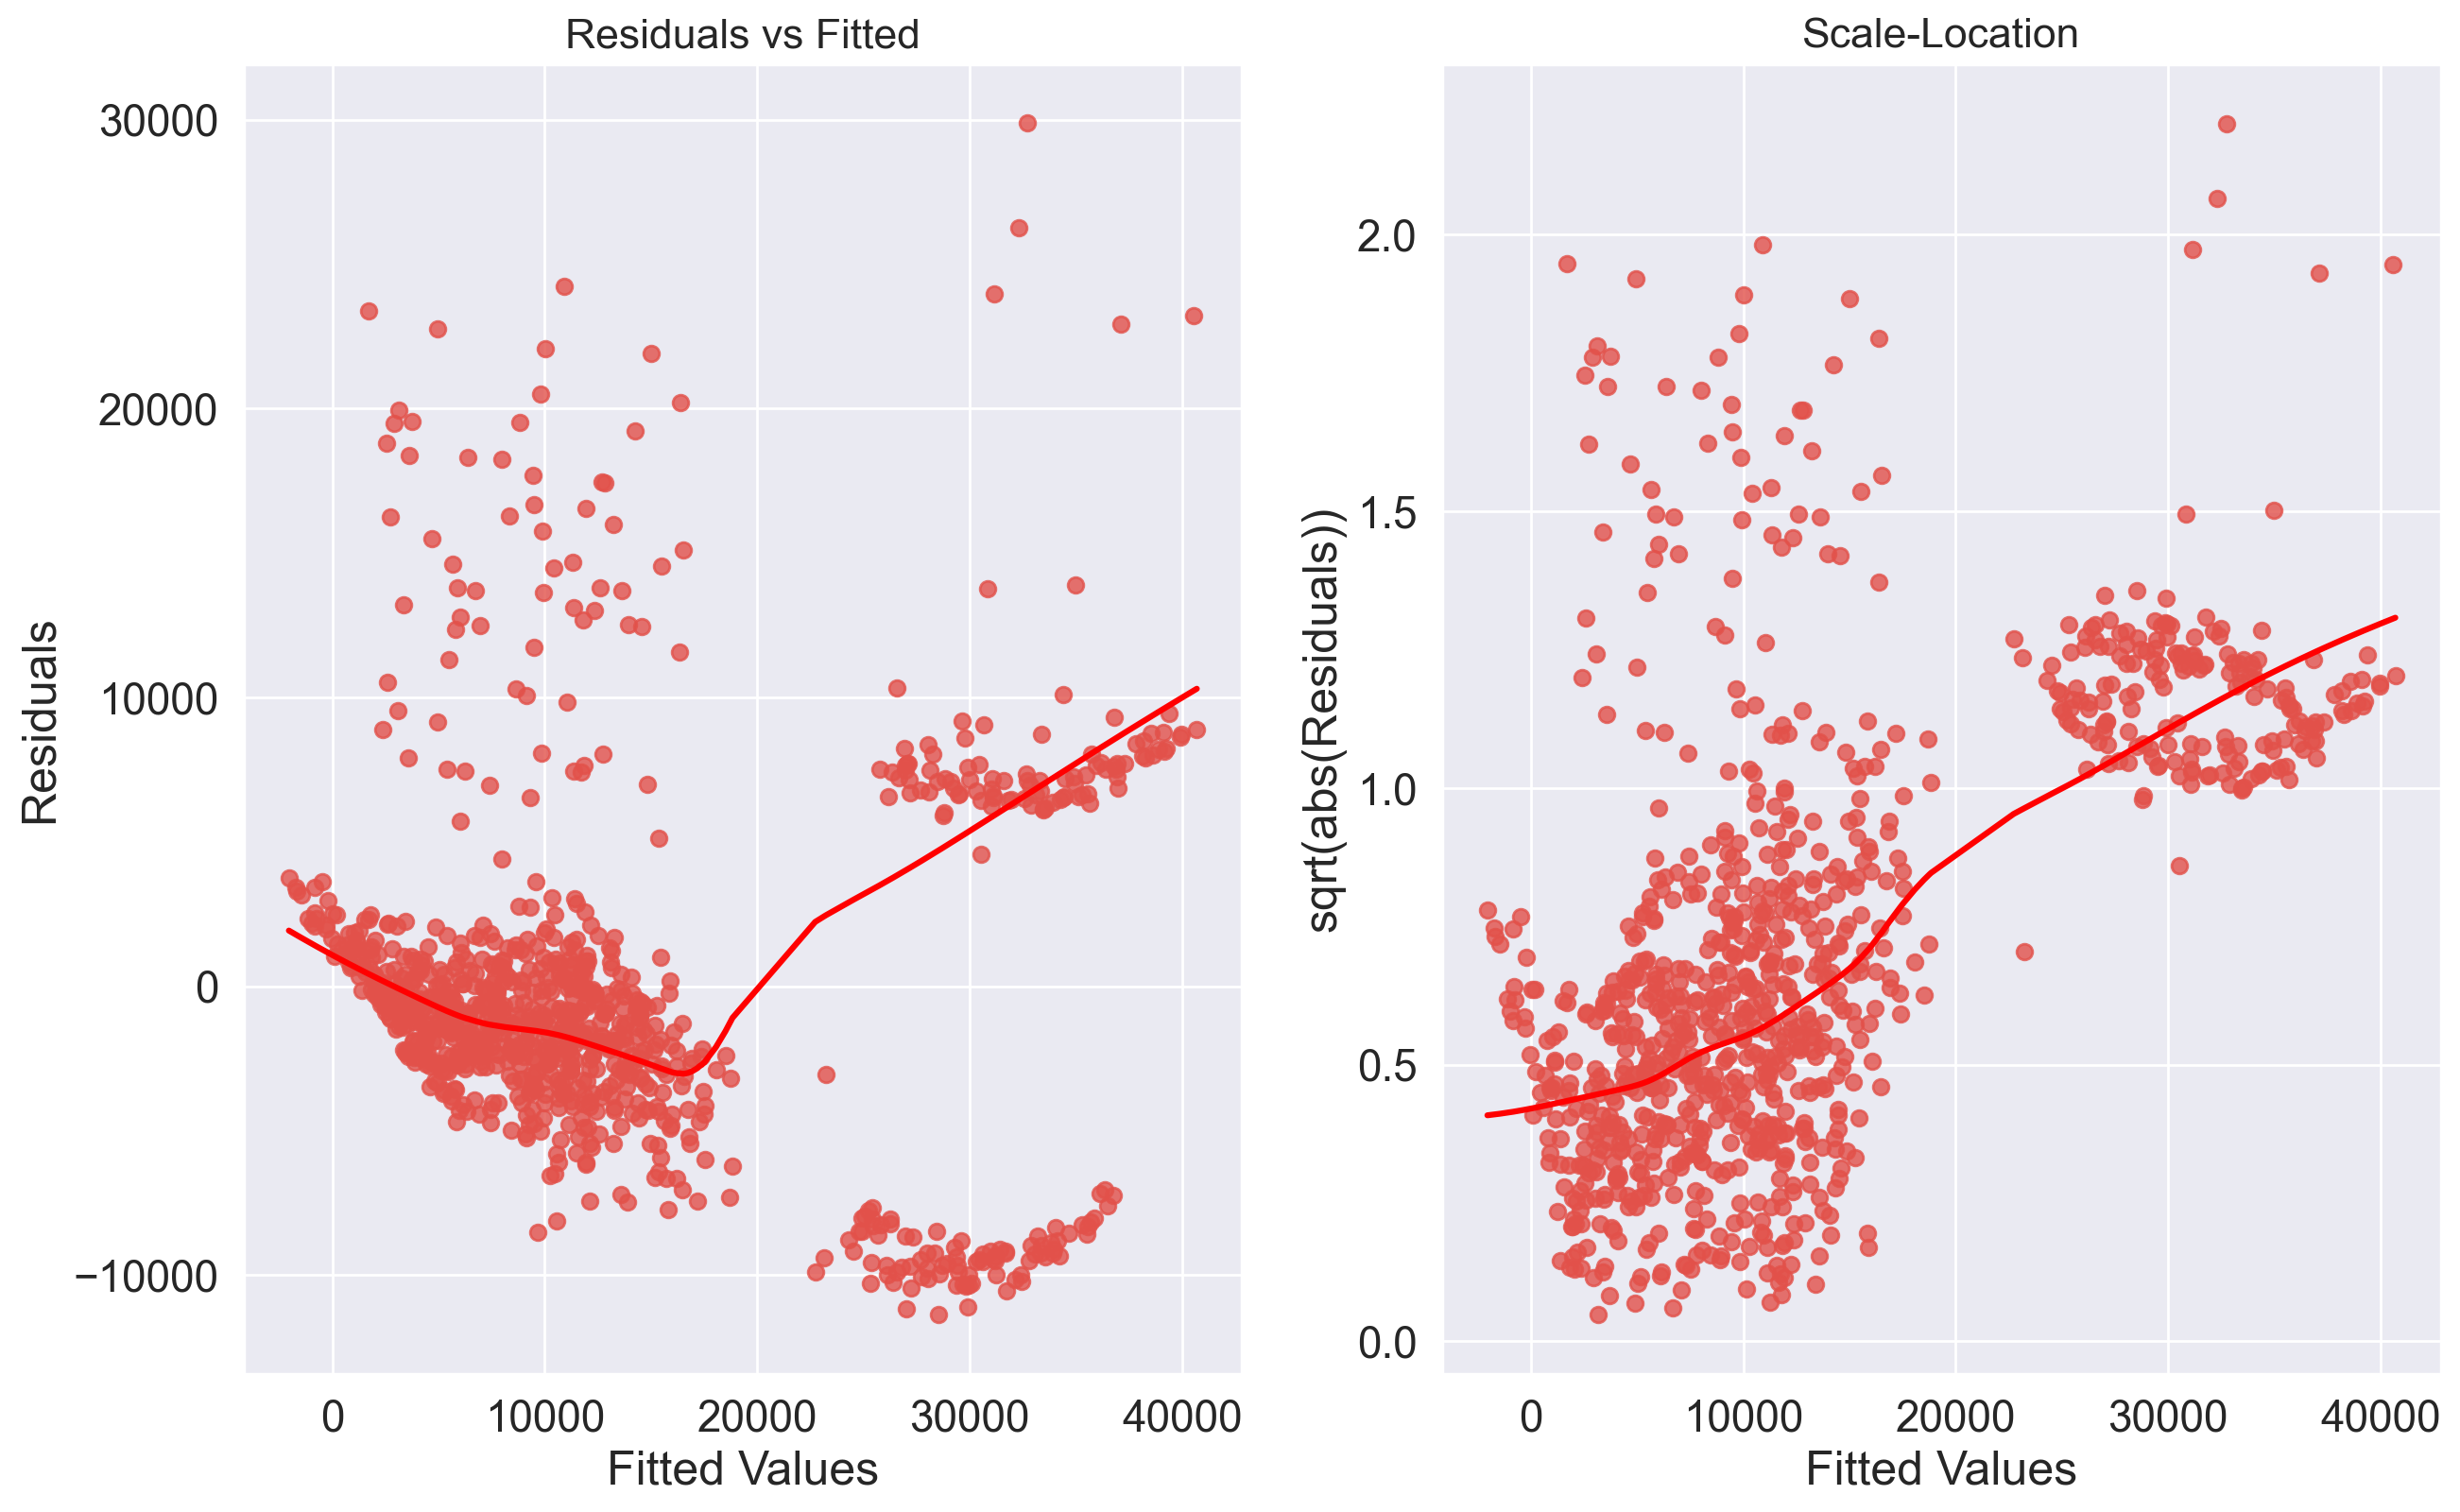

In [ ]:
from statsmodels.compat import lzip
# from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = model
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

Here, p value is less than 0.05 so, it is homoscedasticity distribution.

## 5. **No autocorrelation of residuals**

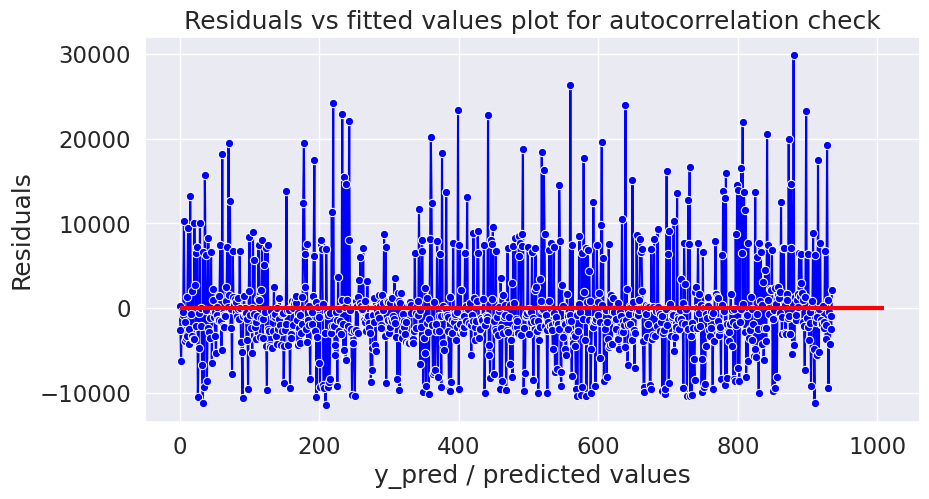

In [38]:
plt.figure(figsize=(10,5))
p = sns.lineplot(data = residuals, marker='o', color='blue')

plt.xlabel('y_pred / predicted values')
plt.ylabel('Residuals')
plt.hlines(xmin = 0, xmax = 1010, y = 0, linewidth = 3, colors=['red'])

p = plt.title('Residuals vs fitted values plot for autocorrelation check')

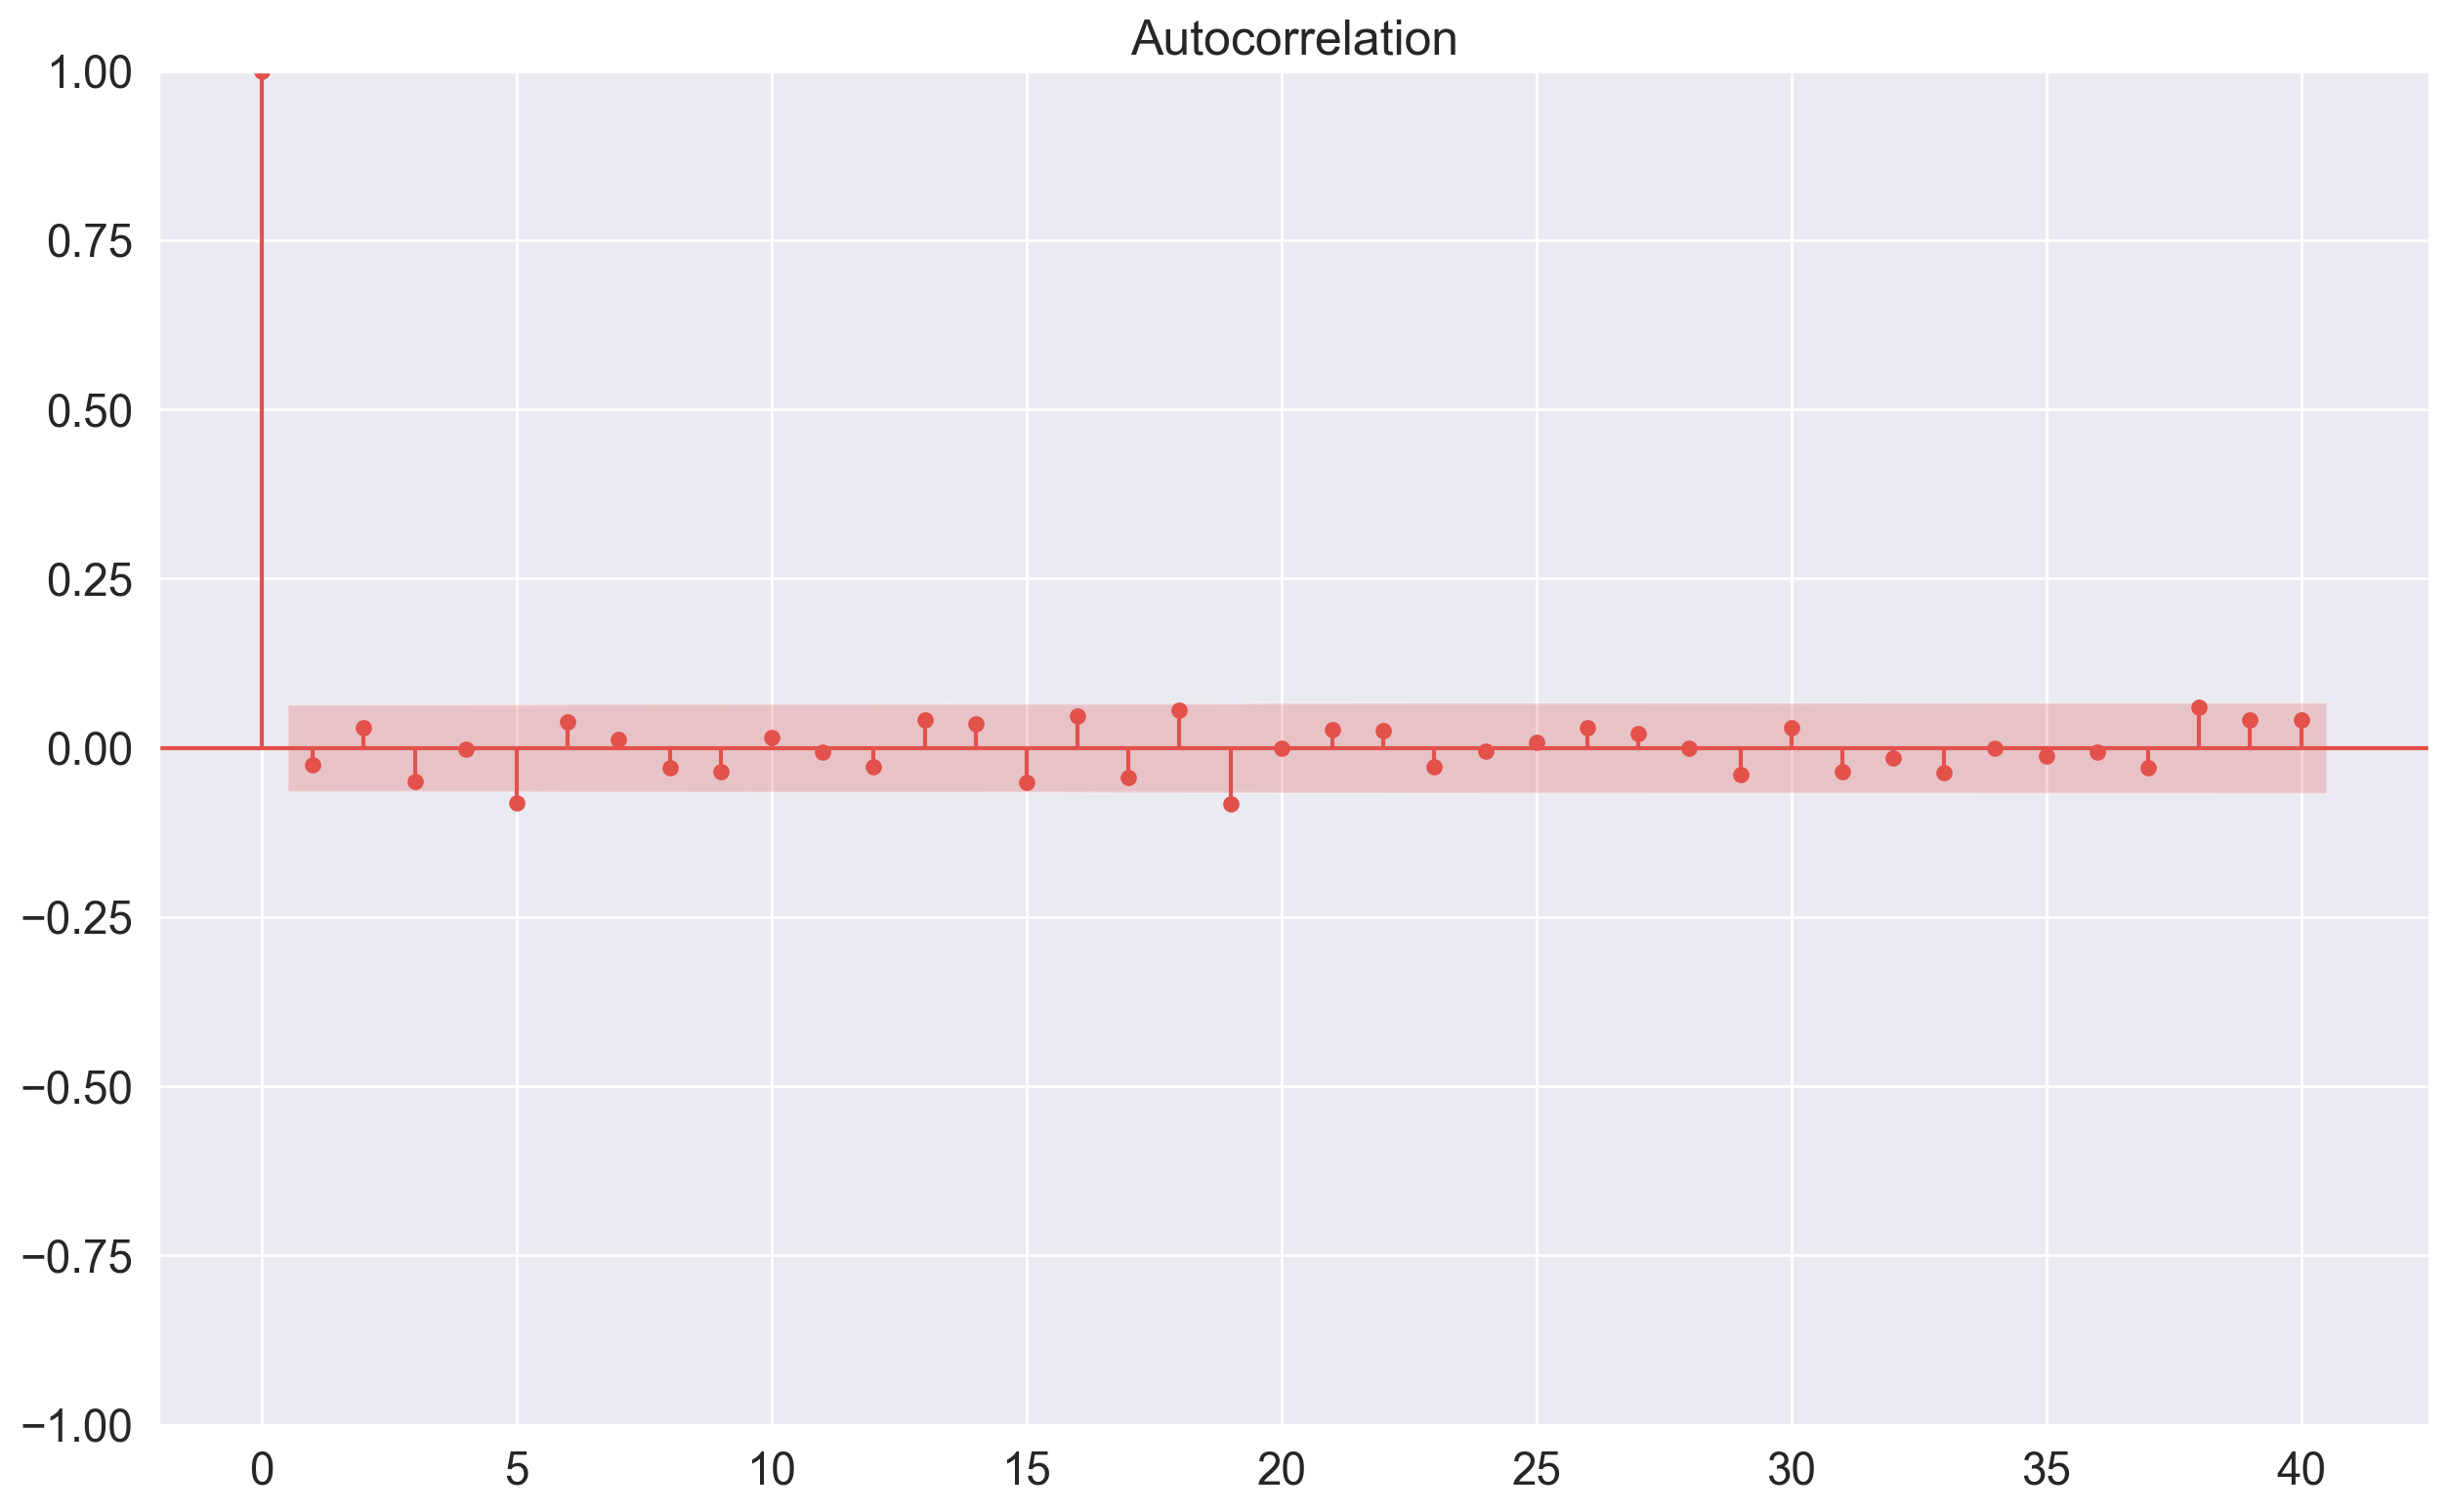

In [ ]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()

The results show signs of autocorelation since there are spikes outside the red confidence interval region. This could be a factor of seasonality in the data.

In [40]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

2.0506577247598177

Durbin Watson is almost close to 2 so there is no auto correlation

## 6. **No perfect multicollinearity**

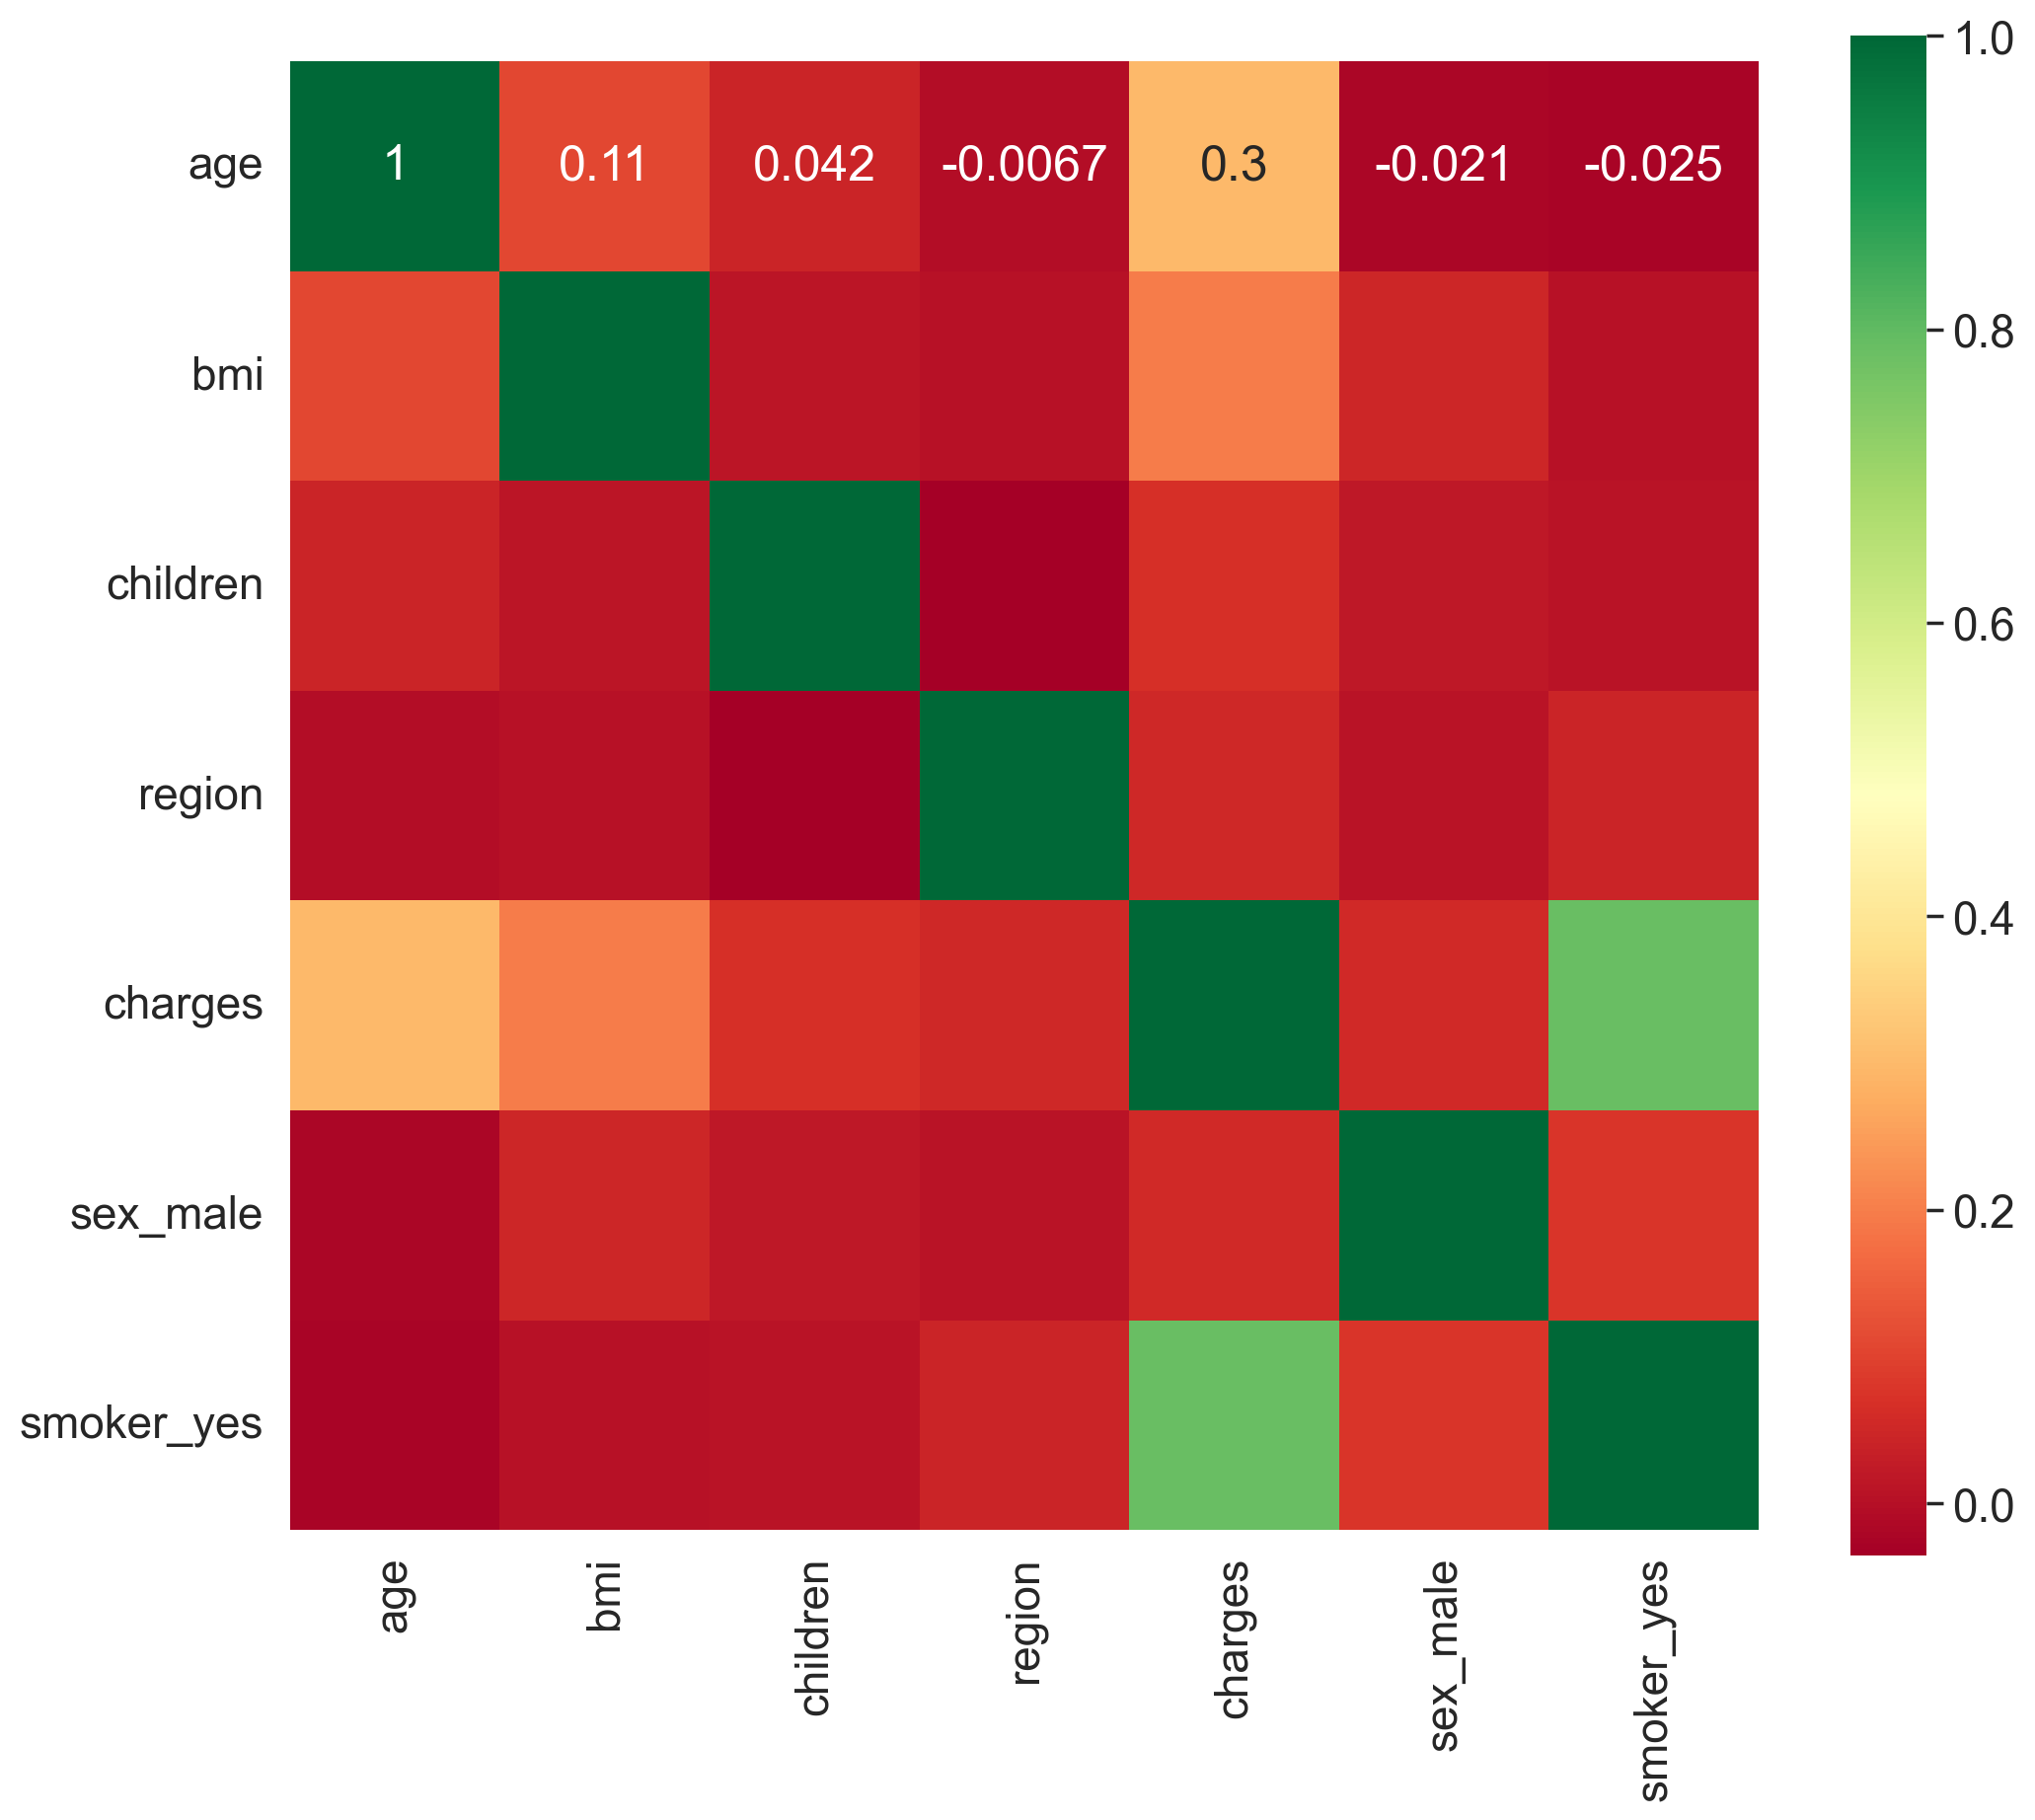

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(dataset.corr(), annot=True,cmap='RdYlGn',square=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train_const is your training data with added constant
# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Feature"] = x_train_const.columns
vif["VIF"] = [variance_inflation_factor(x_train_const.values, i) for i in range(x_train_const.shape[1])]

# Display VIF
print(vif)


      Feature        VIF
0       const  36.540881
1         age   1.021758
2         bmi   1.015767
3    children   1.006974
4      region   1.009071
5    sex_male   1.005976
6  smoker_yes   1.013587


Since VIF factor for all features is less than 5 so no multicollinearity exists